In [1]:
import json

with open('results/experiment_loop_results.json') as f:
    results_data = json.load(f)

with open('descriptors/descriptors_cub.json') as f:
    descriptors_data = json.load(f)

# Results data structure:
# 'model_size' > 'dataset' > 'cut_proportion' > 'similarity_penalty_config' > 'frequency_penalty_type'

# Experimental variables
model_size = "ViT-B/32"
datasets = ['cub']
cut_proportions = [1.0]
similarity_penalty_configs = [False]
frequency_penalty_types = [None, "freq_is", "freq_contains"]

# Results
for cut_proportion in cut_proportions:
    for dataset_name in datasets:
        for similarity_penalty_config in similarity_penalty_configs:
            for frequency_penalty_type in frequency_penalty_types:
                print("Model size:", model_size, "|| Dataset:", dataset_name, "|| Cut Proportion:", cut_proportion, "|| Sim. Penalty:", similarity_penalty_config, "|| Freq. Penalty:", frequency_penalty_type)
                print("Output:", results_data[model_size][dataset_name][str(cut_proportion)][str(similarity_penalty_config)][str(frequency_penalty_type)]["Total Description-based Top-1 Accuracy: "], "\n")

Model size: ViT-B/32 || Dataset: cub || Cut Proportion: 1.0 || Sim. Penalty: False || Freq. Penalty: None
Output: 53.05488705635071 

Model size: ViT-B/32 || Dataset: cub || Cut Proportion: 1.0 || Sim. Penalty: False || Freq. Penalty: freq_is
Output: 53.210216760635376 

Model size: ViT-B/32 || Dataset: cub || Cut Proportion: 1.0 || Sim. Penalty: False || Freq. Penalty: freq_contains
Output: 53.210216760635376 



## Compare the descriptor count to the ordering of class-wise results
Both:
- Difference
- D-CLIP results

[53.33333536982536, 40.00000059604645, 33.33333283662796, 30.000001192092896, 28.57142835855484, 23.333334177732468, 23.333333432674408, 22.727271914482117, 20.000001043081284, 20.000000298023224, 20.000000298023224, 19.999998807907104, 18.518513441085815, 17.391303554177284, 16.66666865348816, 16.66666865348816, 13.793103769421577, 13.333335518836975, 13.333335518836975, 13.333334028720856, 13.333334028720856, 13.333332538604736, 13.333332538604736, 13.333332538604736, 13.333332538604736, 10.34482792019844, 10.34482717514038, 10.000002384185791, 10.000002384185791, 10.000002384185791, 10.000000894069672, 9.999999403953552, 9.999999403953552, 9.999996423721313, 9.999996423721313, 9.999996423721313, 9.999996423721313, 8.695650100708008, 7.142859697341919, 6.896555423736572, 6.8965524435043335, 6.896552070975304, 6.666667014360428, 6.666666641831398, 6.666666269302368, 6.666666269302368, 6.666666269302368, 6.666666269302368, 6.666666269302368, 6.666666269302368, 6.666666269302368, 6.6666

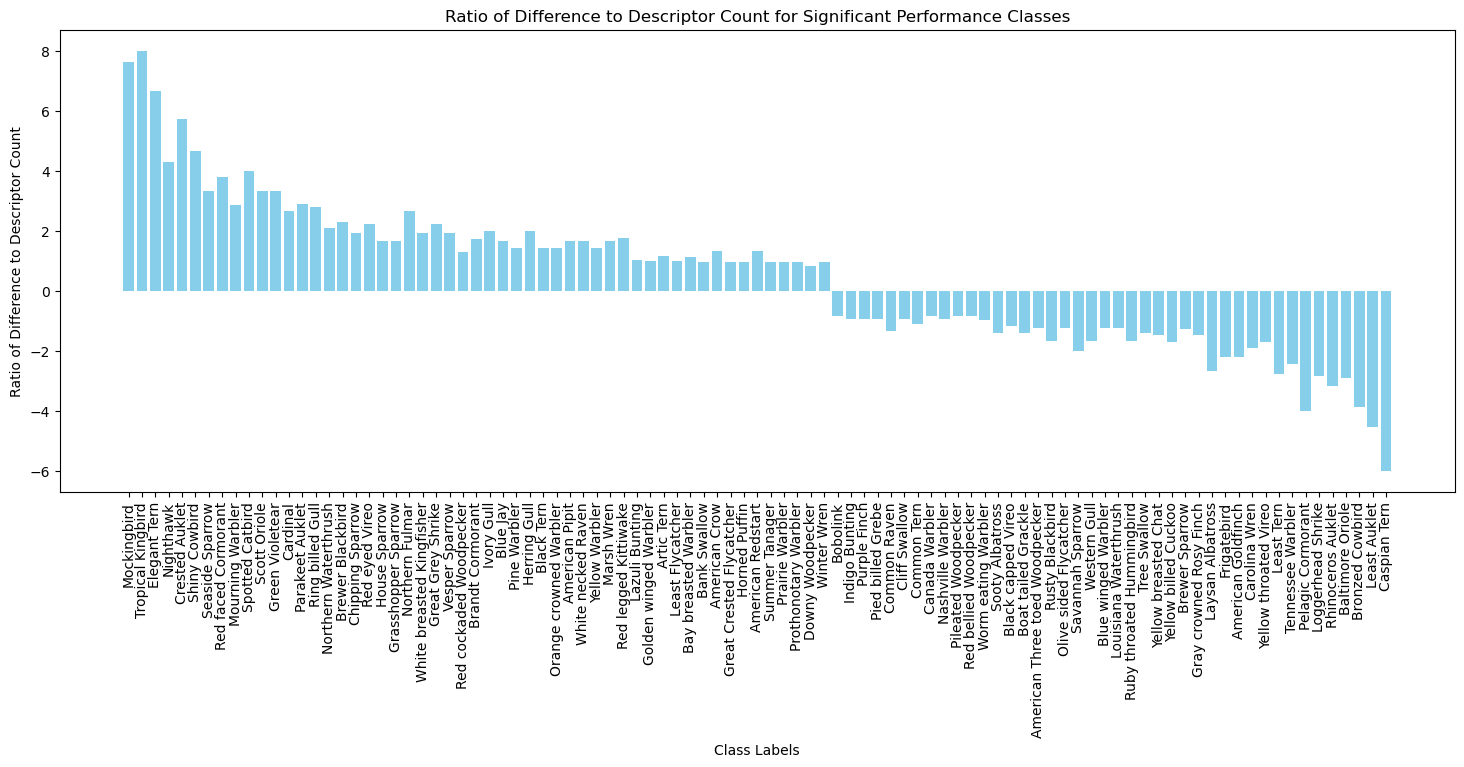

In [91]:
import matplotlib.pyplot as plt

# Look up the name of each class
output = []
for numbered_class_labels, accuracy_stats in results_data[model_size][dataset_name][str(cut_proportion)][str(similarity_penalty_config)][str(frequency_penalty_type)]["Class-wise Accuracies and Differences"].items():
    numbered_class_labels = numbered_class_labels.split(".")[1].replace("_", " ").replace("-", " ")
    for stat_type, stat in accuracy_stats.items():
        if stat_type == "Difference":
            for class_label, descriptor in descriptors_data.items():
                class_label = class_label.replace("_", " ").replace("-", " ")
                if numbered_class_labels in class_label:
                    output.append([class_label, stat, len(descriptor)])

class_labels = []
differences = []
descriptor_count = []
ratio_of_difference_to_count = []

for i in range(len(output)):
    if output[i][1] <= 5.01 and output[i][1] >= -5.01:
        continue
    else:
        class_labels.append(output[i][0])
        differences.append(output[i][1])
        descriptor_count.append(output[i][2])
        ratio_of_difference_to_count.append(output[i][1] / output[i][2])

print(differences)
print(descriptor_count)

plt.figure(figsize=(18, 6))
plt.bar(class_labels, ratio_of_difference_to_count, color='skyblue')
plt.xticks(rotation='vertical')

plt.xlabel('Class Labels')
plt.ylabel('Ratio of Difference to Descriptor Count')
plt.title('Ratio of Difference to Descriptor Count for Significant Performance Classes')
plt.show()